<p><img style="float:right; margin:0px; padding:20px; max-height:50px" src="https://upload.wikimedia.org/wikipedia/commons/1/1a/Logo_uab.png"></p>
<p style="text-align:justify;">

LARA CASTILLEJO ROIG, 1641027

JÚLIA LIPIN GENER REY, 1667764

***
<h1 style="font-family: 'Arial'; font-weight: bold;">APRENENTATGE COMPUTACIONAL | UAB</h1>

<h2 style="font-family: 'Arial'; font-weight: bold;">CAS KAGGLE. SPOTIFY SONG ATTRIBUTES.</h2>

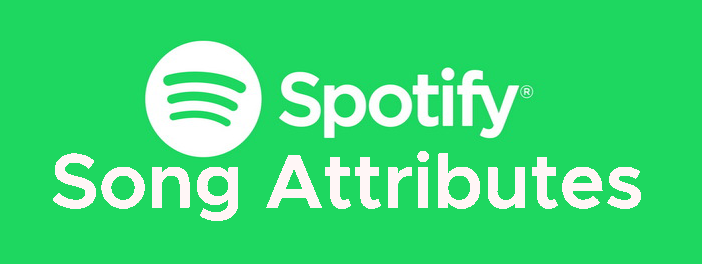

# 0. Introducció

<section style="color: #525958;">
<p style="font-family: 'Arial'; font-size:16px;"> En aquest jupyter estarem treballant sobre la base de dades del cas Kaggle de Spotify song attributes. <a href="https://www.kaggle.com/datasets/geomack/spotifyclassification">Kaggle</a></p>

<p style="font-family: 'Arial'; font-size:16px;">Aquest conjunt de dades de 2017 obtingudes de l'API de Spotify, contenen metadades sobre cançons, incloent-hi diverses característiques musicals com la <span style="font-style:italic; font-family: 'Arial'; font-size:16px;">danceability, acousticness, energy,</span> entre d'altres. A més a més, cada cançó té assignada una etiqueta ("target"), indicant si l'usuari li ha donat like a aquesta cançó o no.</p>

<p style="font-family: 'Arial'; font-size:16px;">D'aquesta manera el nostre objectiu principal serà explorar les dades per comprendre les característiques musicals de cada cançó i utilitzar aquesta informació per construir un model de classificació. Aquest model intentarà predir si una cançó serà del gust de l'usuari en funció de les seves característiques musicals.</p>
</section>

In [11]:
import pandas as pd
from IPython.display import Markdown

# 1. EDA | Exploratory Data Analysis

<section style="color: #525958;">
<p style="font-family: 'Arial'; font-size:16px;"> D'aquesta manera el primer que farem serà un anàlisi exploratori per a comprendre les dades, les seves relacions i les diferents distribució amb les que treballarem.</p>
</section>

In [18]:
df = pd.read_csv("database/data.csv")
df = df.drop("Unnamed: 0", axis="columns")

num_files = df.shape[0]
num_columns = df.shape[1]
display(df.head())
display(Markdown(f"""
<section style="color: #525958;"><p style="font-family: 'Arial'; font-size:16px;">Ens trobem que a la nostra base de dades tenim {num_files} cançons i {num_columns} atributs, considerant que hem tret la columna 'Unnamed: 0' que és el número de fila.</p>
</section>"""))

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys



<section style="color: #525958;"><p style="font-family: 'Arial'; font-size:16px;">Ens trobem que a la nostra base de dades tenim 2017 cançons i 16 atributs, considerant que hem tret la columna 'Unnamed: 0' que és el número de fila.</p>
</section>

<section style="color: #525958;">
<p style="font-family: 'Arial'; font-size:16px;">Si profunditzem una mica més podem veure de què tracten cada un.</p>
<ul>
    <li>Acousticness: Mesura l'acústica de la cançó.</li>
    <li>Danceability: Mesura de la facilitat amb la qual es pot ballar la cançó.</li>
    <li>Duration_ms: Duració de la cançó en mil·lisegons.</li>
    <li>Energy: Mesura de l'energia de la cançó, basada en la intensitat i la dinàmica del so.</li>
    <li>Instrumentalness: Mesura de la quantitat d'instrumentalització en la cançó.(Com més alt, menys instrumental vocal hi ha)</li>
    <li>Key: Tonalitat de la cançó.</li>
    <li>Liveness: Mesura que indica la probabilitat que la cançó hagi estat enregistrada en un estudi o en viu.</li>
    <li>Loudness: Mesura del volum de la cançó en decibels.</li>
    <li>Mode: Manera en què es percep la cançó. (alegre, melancòlica...)</li>
    <li>Speechines: Mesura de la quantitat de parla en la cançó. </li>
    <li>Tempo: Velocitat de la cançó en batuts per minut.</li>
    <li>Time_signature: Mesura de la signatura de temps.</li>
    <li>Valence: Mesura de l'estat d'ànim de la cançó.</li>
    <li>Target: Valor que indica si a l'usuari li ha agradat la cançó. </li>
    <li>Song_title: Nom de la cançó.</li>
    <li>Artist: Interpreta de la cançó.</li>
</ul>
</section>

<section style="color: #525958;">
<p style="font-family: 'Arial'; font-size:16px;">Ara que ja sabem de què tracta cada atribut, seria interessant veure també quin tipus de variable són i sí algun d'ells conte NaNs, ja que fer això ens ajudarà a l'hora de fer preprocessing.</p>
</section>

In [26]:
tipus_dades = df.dtypes

tipus = pd.DataFrame({
    'Atribut': tipus_dades.index,
    'Tipus de Dades': tipus_dades.values,
    'NaN': df.isna().sum().values,
    'Elements diferents': df.nunique().values
})
tipus

,Atribut,Tipus de Dades,NaN,Elements diferents
0,acousticness,float64,0,1394
1,danceability,float64,0,632
2,duration_ms,int64,0,1921
3,energy,float64,0,719
4,instrumentalness,float64,0,1107
5,key,int64,0,12
6,liveness,float64,0,793
7,loudness,float64,0,1808
8,mode,int64,0,2
9,speechiness,float64,0,792


<section style="color: #525958;">
<p style="font-family: 'Arial'; font-size:16px;">Observant la taula obtinguda podem adonar-nos que tots els atributs són numèrics excepte song_title i artist, fet que des del principi ja se sospitava que fos així. També podem mencionar que mode i target són binaris.</p>

<p style="font-family: 'Arial'; font-size:16px;">Per altra banda, podem observar que no hi ha cap NaN a tota la base de dades, fet que ens facilitarà la feina en el preprocessament, ja que no caldrà gestionar valors nuls i podrem tenir un flux de treball més directe.</p>

# 2. Preprocessing

- StandardScaler -> normalizar datos (de cada atributo)
- frequency encoding -> tratar categoricas (artista), ya que la mitad de valores estan repetidos
- qcut -> separar por cuartiles
- mirar correlacion de cada atributo con target -> quitar atributos que no sean relevantes

# 3. Metric Selection

- comparar accuracy, precision, recall, f1-score...
- coger hiperparametros de cada uno -> best_params

# 4. Model Selection | Cross Validation

- data split (X_train, X_test,y_train, y_test)
- aplicar cross validation para ver rendimiento (Regressio logística, arbol decision, random forest, KNN) -> train y test (para ver como funciona en ambos)

# 5. Anàlisi Final

- comprovacion importancia de cada  -> feature_importance